<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n20.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.885564,45.536138,0.055957,155.477660,155.419404,0.058256
1,0.0,1.0,54.986176,69.140505,0.028127,134.154807,134.125956,0.028851
2,0.0,2.0,59.056284,23.366077,-0.023017,92.399344,92.418950,-0.019606
3,0.0,3.0,37.716531,58.803866,0.044807,106.565205,106.519147,0.046058
4,0.0,4.0,88.491415,75.152350,-0.039219,173.604546,173.643243,-0.038697
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.094957,71.631741,-0.000290,179.726408,179.737487,-0.011079
119996,999.0,116.0,84.074774,20.809049,0.082457,114.966281,114.906326,0.059954
119997,999.0,117.0,63.101472,57.848849,-0.072638,130.877683,130.953453,-0.075770
119998,999.0,118.0,95.582913,40.627650,0.142100,146.352663,146.230596,0.122067


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.885564,45.536138,0.055957,155.477660,155.419404,0.058256
1,0.0,1.0,54.986176,69.140505,0.028127,134.154807,134.125956,0.028851
2,0.0,2.0,59.056284,23.366077,-0.023017,92.399344,92.418950,-0.019606
3,0.0,3.0,37.716531,58.803866,0.044807,106.565205,106.519147,0.046058
4,0.0,4.0,88.491415,75.152350,-0.039219,173.604546,173.643243,-0.038697
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.094957,71.631741,-0.000290,179.726408,179.737487,-0.011079
119996,999.0,116.0,84.074774,20.809049,0.082457,114.966281,114.906326,0.059954
119997,999.0,117.0,63.101472,57.848849,-0.072638,130.877683,130.953453,-0.075770
119998,999.0,118.0,95.582913,40.627650,0.142100,146.352663,146.230596,0.122067


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.885564  45.536138  0.055957  155.477660  155.419404  0.058256
      1.0    54.986176  69.140505  0.028127  134.154807  134.125956  0.028851
      2.0    59.056284  23.366077 -0.023017   92.399344   92.418950 -0.019606
      3.0    37.716531  58.803866  0.044807  106.565205  106.519147  0.046058
      4.0    88.491415  75.152350 -0.039219  173.604546  173.643243 -0.038697
...                ...        ...       ...         ...         ...       ...
999.0 115.0  98.094957  71.631741 -0.000290  179.726408  179.737487 -0.011079
      116.0  84.074774  20.809049  0.082457  114.966281  114.906326  0.059954
      117.0  63.101472  57.848849 -0.072638  130.877683  130.953453 -0.075770
      118.0  95.582913  40.627650  0.142100  146.352663  146.230596  0.122067
      119.0  89.238674  96.643310 -0.005326  195.876658  195.881535 -0.004877

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.885564  45.536138  0.055957  155.477660  155.419404  0.058256
      1.0    54.986176  69.140505  0.028127  134.154807  134.125956  0.028851
      2.0    59.056284  23.366077 -0.023017   92.399344   92.418950 -0.019606
      3.0    37.716531  58.803866  0.044807  106.565205  106.519147  0.046058
      4.0    88.491415  75.152350 -0.039219  173.604546  173.643243 -0.038697
...                ...        ...       ...         ...         ...       ...
999.0 115.0  98.094957  71.631741 -0.000290  179.726408  179.737487 -0.011079
      116.0  84.074774  20.809049  0.082457  114.966281  114.906326  0.059954
      117.0  63.101472  57.848849 -0.072638  130.877683  130.953453 -0.075770
      118.0  95.582913  40.627650  0.142100  146.352663  146.230596  0.122067
      119.0  89.238674  96.643310 -0.005326  195.876658  195.881535 -0.004877

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.885564,45.536138,0.055957,155.477660,155.419404,0.058256
1,0.0,1.0,54.986176,69.140505,0.028127,134.154807,134.125956,0.028851
2,0.0,2.0,59.056284,23.366077,-0.023017,92.399344,92.418950,-0.019606
3,0.0,3.0,37.716531,58.803866,0.044807,106.565205,106.519147,0.046058
4,0.0,4.0,88.491415,75.152350,-0.039219,173.604546,173.643243,-0.038697
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.094957,71.631741,-0.000290,179.726408,179.737487,-0.011079
119996,999.0,116.0,84.074774,20.809049,0.082457,114.966281,114.906326,0.059954
119997,999.0,117.0,63.101472,57.848849,-0.072638,130.877683,130.953453,-0.075770
119998,999.0,118.0,95.582913,40.627650,0.142100,146.352663,146.230596,0.122067


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.885564  45.536138  0.055957  155.477660  155.419404  0.058256
      1.0    54.986176  69.140505  0.028127  134.154807  134.125956  0.028851
      2.0    59.056284  23.366077 -0.023017   92.399344   92.418950 -0.019606
      3.0    37.716531  58.803866  0.044807  106.565205  106.519147  0.046058
      4.0    88.491415  75.152350 -0.039219  173.604546  173.643243 -0.038697
...                ...        ...       ...         ...         ...       ...
999.0 115.0  98.094957  71.631741 -0.000290  179.726408  179.737487 -0.011079
      116.0  84.074774  20.809049  0.082457  114.966281  114.906326  0.059954
      117.0  63.101472  57.848849 -0.072638  130.877683  130.953453 -0.075770
      118.0  95.582913  40.627650  0.142100  146.352663  146.230596  0.122067
      119.0  89.238674  96.643310 -0.005326  195.876658  195.881535 -0.004877

[120000 rows x 6 columns]

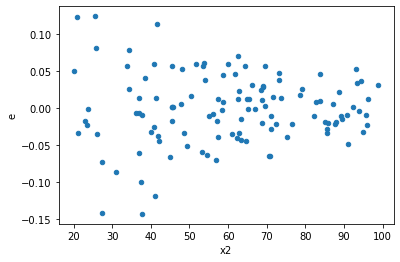

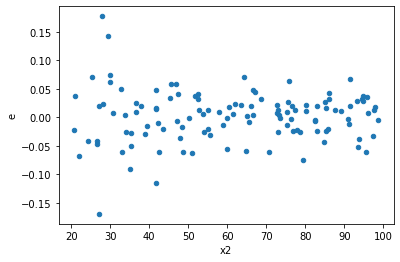

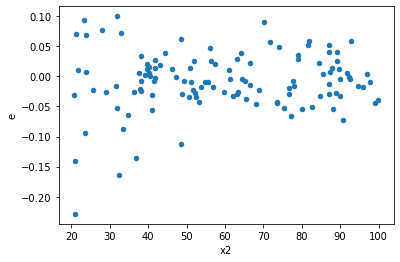

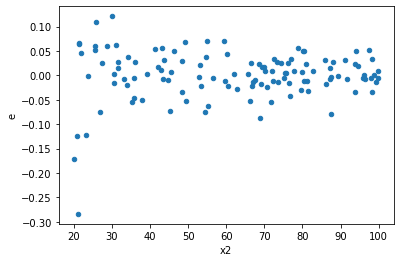

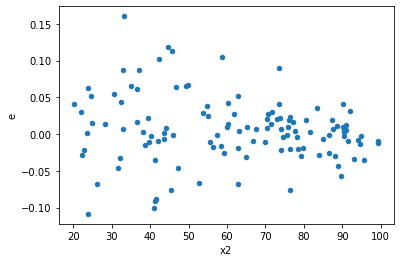

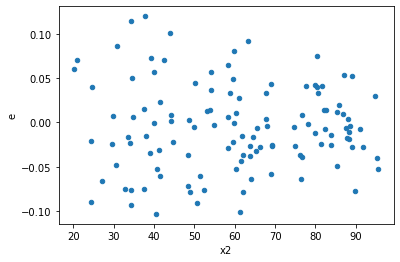

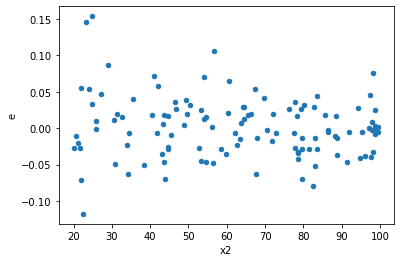

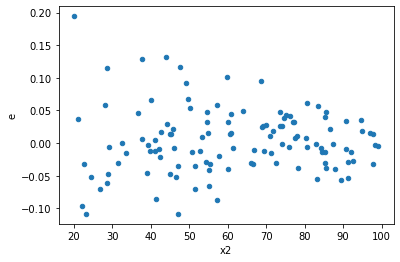

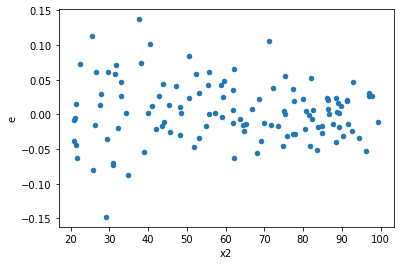

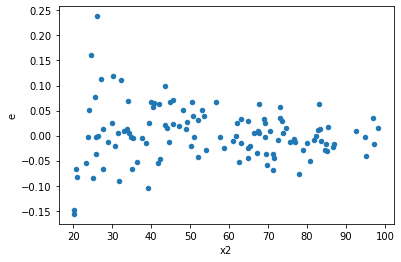

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.18394391010307723,0.03396497314861802,0.0039987806544147225,0.0007383689814916962,0.18464853296629916,6.443372799731579e-08,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,0.17224838287911293,0.040321998557323546,0.0037445300625894113,0.0008765651860287727,0.2340921748195585,2.530573195048001e-06,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.2000260856920364,0.06683032541801237,0.004348393167218183,0.0014528331612611385,0.33410804989158005,0.00030475013592149786,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.22731240782994458,0.035681867620463506,0.004941574083259665,0.0007756927743579023,0.1569728109481713,4.3300187652240655e-09,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,0.17023312090502657,0.03396947106514923,0.0037007200196744906,0.0007384667622858527,0.1995467796428456,2.222564903545234e-07,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.1610121460924328,0.050219842354137345,0.0035002640454876695,0.0010917357033508118,0.31190095637448034,0.00012985506003386084,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,0.11558293734351119,0.04487448631545834,0.0025126725509458953,0.0009755323112056161,0.3882449031563532,0.0017204168868249804,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.19701103792777303,0.040592299167630366,0.0042828486506037615,0.000882441286252834,0.20604073555773084,3.6666665918596343e-07,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,0.14741780903196267,0.03598356161691137,0.00320473497895571,0.0007822513394980733,0.2440923647773759,4.657648717919657e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    979
Reject001=1 : Homoscedasticity       21
Name: Result_test, dtype: int64